# 实验报告

In [3]:
import os
import pdfplumber

def get_file_list(dirpath):
    file_list = []
    filenames=os.listdir(dirpath)
    for filename in filenames:
        file_list.append(dirpath + '\\' + filename)
    return file_list

def get_information(table_list, table_type):
    information_dict = {}
    if table_type == 'information':
        step = 2
    elif table_type == 'item':
        step = 5
    table_list = [table_list[i:i+step] for i in range(0,len(table_list),step)]
    for i in range(len(table_list)):
        if '股票简称' in table_list[i][0]:
            information_dict['股票简称'] = table_list[i][1]
        elif '股票代码' in table_list[i][0]:
            information_dict['股票代码'] = table_list[i][1]
        elif '法定代表人' in table_list[i][0]:
            information_dict['公司的法定代表人'] = table_list[i][1]
        elif '办公地址' in table_list[i][0]:
            information_dict['办公地址'] = table_list[i][1]
        elif '网址' in table_list[i][0]:
            information_dict['公司网址'] = table_list[i][1]
        elif '电子信箱' in table_list[i][0]:
            information_dict['电子信箱'] = table_list[i][1]
        elif '归属于上市公司股东的净利润' in table_list[i][0]:
            information_dict['17年股东净利润'] = table_list[i][4]
            information_dict['18年股东净利润'] = table_list[i][2]
            information_dict['19年股东净利润'] = table_list[i][1]
    return information_dict

def get_table_list(file, key_word):
    table_list = []
    with pdfplumber.open(file) as pdf:
        for page in range(len(pdf.pages)):
            tables = pdf.pages[page].extract_tables()
            for table in tables:
                if table:
                    if key_word in table[0]:
                        for line in table:
                            line = list(filter(None, line))
                            if len(line) < 2 or (key_word == '2019年' and key_word in line[0]):
                                continue
                            for text in line:
                                table_list.append(text)
                        return table_list
        print(file + '未找到' +key_word+ '所在表格')
        return []
        
if __name__ == '__main__':
    dirpath = r'C:/Users/17611/Documents/Python/2019'
    information_list = []
    file_list = get_file_list(dirpath)
    for file in file_list:
        
        table_list = get_table_list(file, '股票简称')
        information_dict = get_information(table_list, 'information')
        item = get_table_list(file, '2019年')
        item_dict = get_information(item, 'item')
        information_dict.update(item_dict)
        information_list.append(information_dict)
        
    for i in information_list:
        print(i)


C:/Users/17611/Documents/Python/2019\300169：2019年年度报告.pdf未找到2019年所在表格
{'股票简称': '恒信东方', '股票代码': '300081', '公司的法定代表人': '孟宪民', '办公地址': '100097', '公司网址': 'http://www.hxgro.com/', '电子信箱': 'office@hxgro.com', '17年股东净利润': '94,144,447.19', '18年股东净利润': '198,317,704.59', '19年股东净利润': '56,331,886.52'}
{'股票简称': '同益股份', '股票代码': '300538', '公司的法定代表人': '邵羽南', '办公地址': '518101', '公司网址': 'www.tongyiplastic.com', '电子信箱': 'tongyizq@tongyiplastic.com'}
{'股票简称': '创业慧康', '股票代码': '300451', '公司的法定代表人': '葛航', '办公地址': '310052', '公司网址': 'https://www.bsoft.com.cn/', '电子信箱': 'bsoft@bsoft.com.cn', '17年股东净利润': '163,244,227.81', '18年股东净利润': '212,681,116.27', '19年股东净利润': '314,070,351.32'}
{'股票简称': '惠伦晶体', '股票代码': '300460', '公司的法定代表人': '赵积清', '办公地址': '523757', '公司网址': 'http://www.dgylec.com', '电子信箱': 'yl@dgylec.com', '17年股东净利润': '23,356,931.14', '18年股东净利润': '-132,952,022.58', '19年股东净利润': '-496.35%'}
{'股票简称': '华中数控', '股票代码': '300161', '公司的法定代表人': '陈吉红', '办公地址': '430223', '公司网址': 'www.huazhongcnc.com', '电子信箱': 'hcnc@hzncc.c

# 公司基本信息

In [5]:
from IPython.display import display,HTML

In [34]:
from pandas import DataFrame
df1 = DataFrame({'股票简称':['恒信东方','创业慧康','惠伦晶体','元力股份','日科化学','博腾股份','万里马','富满电子','久量股份','山鼎设计','幸福蓝海'],
                '股票代码':['300081','300451','300460','300174','300214','300363','300591','None','300808','300492','300528'],
                '公司的法定代表人':['孟宪民','葛航','赵积清','许文显','彭国锋','居年丰','林大耀','刘景裕','卓楚光','陈栗','蒋小平'],
                '办公地址':['100097','310052','523757','353013','262400','400714','510308','518040','510450','610065','210033'],
                '公司网址':['http://www.hxgro.com/','https://www.bsoft.com.cn/','http://www.dgylec.com','www.yuanlicarbon.com','http://www.rikechem.com','http://www.superchip.cn/','http://www.porton.cn','http://www.wanlima.com.cn','http://www.dpled.com/','http://www.cendes-arch.com/','http://www.omnijoi.com/'],
                  '电子邮箱':['office@hxgro.com','bsoft@bsoft.com.cn','yl@dgylec.com','dm@yuanlicarbon.com','rikechem@rikechem.com','porton.db@porton.cn','wlm_stock@wanlima.com.cn','zqb@superchip.cn','securities@dpled.com','cendes.bso@cendes-arch.com','board@omnijoi.com']
                })
              
print('df1: ')
display(HTML(df1.to_html()))

df1: 


# 公司股东净利润

In [25]:
from pandas import DataFrame
df2 = DataFrame({'股票简称':['恒信东方','创业慧康','惠伦晶体','元力股份','日科化学','博腾股份','万里马','富满电子','久量股份','山鼎设计','幸福蓝海'],
                '17年股东净利润':['94,144,447.19','163,244,227.81','23,356,931.14','48,676,748.92','95,085,473.53','107,449,932.43','37,332,410.09','58,830,990.04','63,788,273.67','20,613,083.08','112,463,308.97'],
                '18年股东净利润':['198,317,704.59','212,681,116.27','-132,952,022.58','82,635,672.00','102,767,774.37','124,494,102.44','37,797,261.11','54,185,088.21','89,037,799.58','21,094,012.30','-531,705,386.60'],
                '19年股东净利润':['56,331,886.52', '314,070,351.32','-496.35%','53,549,231.85','177,911,380.66','185,550,375.49','23,998,807.09','36,850,464.40','79,136,116.45','-21.13%','6,571,715.26']})
              
print('df2: ')
display(HTML(df2.to_html()))

df2: 


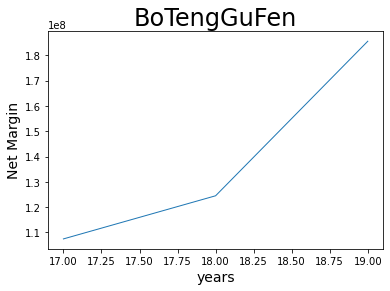

In [41]:
import numpy as np 
from matplotlib import pyplot as plt 
x_values = [17,18,19]
y_values = [107449932.43,124494102.44,185550375.49]
plt.plot(x_values,y_values,linewidth = 1)
plt.title("BoTengGuFen",fontsize = 24)
plt.xlabel("years",fontsize = 14)
plt.ylabel("Net Margin",fontsize = 14)
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.show()

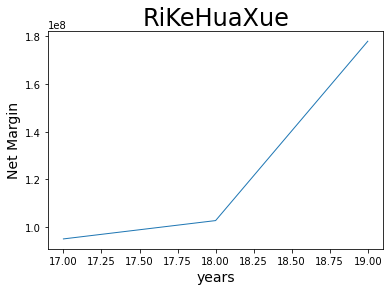

In [48]:
import numpy as np 
from matplotlib import pyplot as plt 
x_values = [17,18,19]
y_values = [95085473.53,102767774.37,177911380.66]
plt.plot(x_values,y_values,linewidth = 1)
plt.title("RiKeHuaXue",fontsize = 24)
plt.xlabel("years",fontsize = 14)
plt.ylabel("Net Margin",fontsize = 14)
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.show()

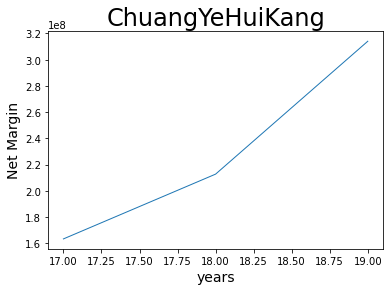

In [49]:
import numpy as np 
from matplotlib import pyplot as plt 
x_values = [17,18,19]
y_values = [163244227.81,212681116.27,314070351.32]
plt.plot(x_values,y_values,linewidth = 1)
plt.title("ChuangYeHuiKang",fontsize = 24)
plt.xlabel("years",fontsize = 14)
plt.ylabel("Net Margin",fontsize = 14)
plt.tick_params(axis='x',labelsize=10)
plt.tick_params(axis='y',labelsize=10)
plt.show()

一个公司的价值最大化就体现在股票价值上面，创业慧康，日科化学，博腾股份这三家公司，从17年到19年每年的股东净利润是在逐年递增的，说明这三家公司每年的经营业绩是很好的，

投资这三家公司的投资者会从中获益，股票价值在逐年递增，公司的成长性比较好，适用于那些注重价值投资的投资者选择。